# Using `sklearn` Pipelines for Custom Data Transformations

The purpose of this notebook is to demonstrate how to perform custom data transformations and analyses using `sklearn` Pipelines.  The relevant Python pseudo-code looks something like this:

```python
# Let's write a custom data transformer as an example!
from sklearn.base import BaseEstimator, TransformerMixin

# The code looks something like this:
class MyMovingAverageAdder(BaseEstimator, TransformerMixin):
    """
    Custom data transformer, intended to be used as part of a `sklearn` Pipeline.
    
    See file `./technical_analysis.py` contained in this directory for more details.
    """
    ...

```

In the code snippet shown above, there are two important points: 

2. The custom class inherits from `sklearn.base.BaseEstimator` so that we may gain methods `get_params()` and `set_params()`, which are useful in hyperparameter optimization, for example.  
1. The custom class inherits from `sklearn.base.TransformerMixin` so that we may gain methods `fit()`, `transform()`, and `fit_transform()`, which are useful in creating data-transformation pipelines, for example.

More information can be found in [sklearn.base](https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20base#module-sklearn.base).


In [1]:
# Autoreload modules we're working on so that changes propagate to this notebook
%load_ext autoreload
%autoreload 1
%aimport technical_analysis

In [2]:
# Import the usual suspects....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [3]:
# Here is our custom code!
from technical_analysis import MovingAverageAdder, BennyIndicators


## Generate Synthetic Test Data

In [68]:
# Define "percent" and other units & shorthands (for clarity below)
percent = 0.01
usd = 1.0  # $US

# Generate some test data
returns_mean = 0.0 * percent
returns_std = 1.0 * percent
num_business_days = 252
initial_price = 200 * usd
returns = returns_mean + (returns_std * np.random.randn(num_business_days))
timeseries = initial_price * (1 + pd.DataFrame(data=returns, columns=['close'])).cumprod()
X = timeseries.copy()  # shorthand

# Display test data
X

,close
0,197.325078
1,200.757335
2,203.087884
3,201.581517
4,199.544729
...,...
247,204.474345
248,202.017175
249,202.767016
250,203.136660


## Build Custom Transformation Pipeline

In [69]:
# Build an `sklearn.pipeline.Pipeline`
pipeline = Pipeline([
   
    ('sma20', MovingAverageAdder(ma_type='sma', window=20)),  # simple moving average (SMA)
    ('ema20', MovingAverageAdder(ma_type='ema', window=20)),  # exponential moving average (EMA)
    ('dema20', MovingAverageAdder(ma_type='dema', window=20)),  # double exponential moving average (DEMA)
    ('tema20', MovingAverageAdder(ma_type='tema', window=20)),  # triple exponential moving average (TEMA) 
    ('benny_indicators', BennyIndicators(bb_window=20))
])

## Transform Data

In [70]:
# Transform the input data
X_transformed = pipeline.fit_transform(X)

In [71]:
X_transformed.tail()

,close,sma20,ema20,dema20,tema20,upper_bb,lower_bb,middle_bb,rsi
247,204.474345,202.435846,203.060391,204.116699,203.826453,206.700256,198.171435,202.435846,55.262122
248,202.017175,202.385787,202.961037,203.826852,203.391899,206.644909,198.126666,202.385787,48.479990
249,202.767016,202.409942,202.942559,203.709197,203.225936,206.672109,198.147774,202.409942,50.477371
250,203.136660,202.513203,202.961045,203.671395,203.183232,206.738742,198.287665,202.513203,51.476083
251,205.033395,202.827623,203.158411,203.979679,203.638362,206.800872,198.854375,202.827623,56.341427


## Plot Results

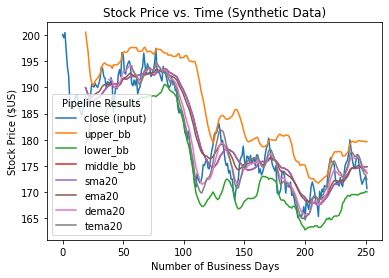

In [26]:
# Plot the results
#ax = X_transformed.plot(linewidth=1.5)
ax = X_transformed.rename(columns={'close': 'close (input)'}).plot()
ax.set_title('Stock Price vs. Time (Synthetic Data)')
ax.set_xlabel('Number of Business Days')
ax.set_ylabel('Stock Price ($US)')
ax.legend(title='Pipeline Results', ncol=1)
plt.show()